In [1]:
# This pandas file merges two financial spreadsheets and one disaster summary spreadsheet.

# The column that facilitates the merge is a concatenation of disaster number, state and county.

# The resulting dataframe can track financial damage by disaster type.

In [2]:
# We'll use Pandas and Numpy for this Program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Read the three necessary files. The first is a summary of declared disasters
# dating back to 1953, with no financial data.  The next two describe FEMA 
# approved moneys for owners and renters, respective, in FY 2019.

complete_df = pd.read_csv('./interim_data/Merged_data.csv')
complete_df

,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0
1125,"4466, TX, San Jacinto (County)",82351,20.0,18.0,2.0,0.0,0.0,4214,3.0,0.0,0.0,Flood,2020.0
1126,"4332, TX, Evangeline (Parish)",0,0.0,0.0,0.0,0.0,0.0,500,1.0,0.0,0.0,0,0.0


In [4]:
complete_df[["Disaster", "State", "County"]] = complete_df.address.str.split(",", expand = True)
complete_df = complete_df.loc[complete_df["incidentType"]!= "0", :]

complete_df["incidentType"] = complete_df["incidentType"].replace({"Hurricane": "Tropical Storm"}) 
complete_df["incidentType"] = complete_df["incidentType"].replace({"Typhoon": "Tropical Storm"}) 

complete_df

C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\paulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,address,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared,Disaster,State,County
0,"4116, IL, Brown (County)",32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Brown (County)
1,"4116, IL, Bureau (County)",622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0,4116,IL,Bureau (County)
2,"4116, IL, Calhoun (County)",31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0,4116,IL,Calhoun (County)
3,"4116, IL, Clark (County)",44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0,4116,IL,Clark (County)
4,"4116, IL, Cook (County)",90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0,4116,IL,Cook (County)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,"4466, TX, Jefferson (County)",18405207,2319.0,1436.0,842.0,41.0,0.0,3933428,1207.0,0.0,0.0,Flood,2020.0,4466,TX,Jefferson (County)
1122,"4466, TX, Liberty (County)",3696788,579.0,435.0,137.0,7.0,0.0,566726,184.0,0.0,0.0,Flood,2020.0,4466,TX,Liberty (County)
1123,"4466, TX, Montgomery (County)",8022615,1100.0,780.0,293.0,27.0,0.0,813403,207.0,0.0,0.0,Flood,2020.0,4466,TX,Montgomery (County)
1124,"4466, TX, Orange (County)",9672865,1585.0,1186.0,374.0,25.0,0.0,1039349,322.0,0.0,0.0,Flood,2020.0,4466,TX,Orange (County)


In [5]:
grouping = complete_df.groupby(complete_df["incidentType"])
type_grouping = grouping.sum()
del type_grouping["fyDeclared"]
type_grouping

,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
incidentType,,,,,,,,,,
Earthquake,36189972,7484.0,6621.0,422.0,441.0,21.0,1241778,1113.0,1.0,0.0
Fire,71933716,5447.0,3611.0,218.0,1618.0,328.0,62744642,10265.0,108.0,16.0
Flood,1425709204,247502.0,201715.0,33127.0,12660.0,4748.0,296157372,89239.0,227.0,43.0
Mud/Landslide,1424708,376.0,364.0,2.0,10.0,9.0,665030,218.0,0.0,0.0
Severe Storm(s),165613733,32403.0,27371.0,3825.0,1207.0,573.0,44154377,14012.0,25.0,12.0
Tornado,18677632,3241.0,2740.0,256.0,245.0,171.0,17169684,5411.0,13.0,5.0
Tropical Storm,3376668721,966516.0,864902.0,79156.0,22458.0,10193.0,1217530711,826654.0,261.0,59.0
Volcano,10080658,627.0,411.0,17.0,199.0,0.0,2209482,381.0,3.0,0.0


In [6]:
grouping_full_prime = type_grouping.sort_values(["IHP Amount for Owners"], ascending = True)

grouping_full = grouping_full_prime.loc[:,["IHP Amount for Owners", "IHP Amount for Renters", "Owners Approved", "Renters Approved"]]
grouping_full["Owners' Average Payout"] = grouping_full["IHP Amount for Owners"]/grouping_full["Owners Approved"]    
grouping_full["Renters' Average Payout"] = grouping_full["IHP Amount for Renters"]/grouping_full["Renters Approved"]    

grouping_full
#sum_grouping["Average Payout for Owners, Dollars"] = sum_grouping["IHP Amount for Owners"]/sum_grouping["Owners Approved"]
#sum_grouping["Average Payout for Renters, Dollars"] = sum_grouping["IHP Amount for Renters"]/sum_grouping["Renters Approved"]
#sum_grouping

,IHP Amount for Owners,IHP Amount for Renters,Owners Approved,Renters Approved,Owners' Average Payout,Renters' Average Payout
incidentType,,,,,,
Mud/Landslide,1424708,665030,376.0,218.0,3789.117021,3050.596330
Volcano,10080658,2209482,627.0,381.0,16077.604466,5799.165354
Tornado,18677632,17169684,3241.0,5411.0,5762.922555,3173.107374
Earthquake,36189972,1241778,7484.0,1113.0,4835.645644,1115.703504
Fire,71933716,62744642,5447.0,10265.0,13206.116394,6112.483390
Severe Storm(s),165613733,44154377,32403.0,14012.0,5111.061723,3151.183057
Flood,1425709204,296157372,247502.0,89239.0,5760.394680,3318.698910
Tropical Storm,3376668721,1217530711,966516.0,826654.0,3493.650101,1472.841976


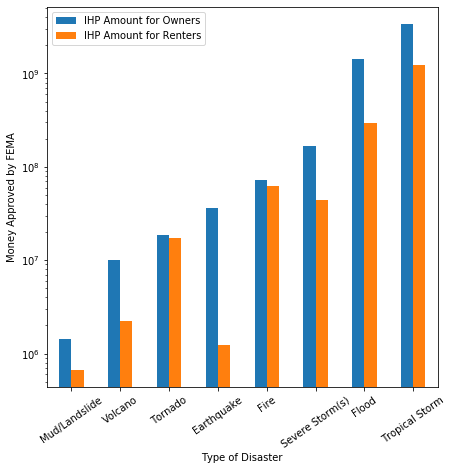

In [20]:
amount_grouping = grouping_full.loc[:,["IHP Amount for Owners", "IHP Amount for Renters"]]
amount_chart = amount_grouping.plot(kind='bar', logy = True, rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
amount_chart.set_xlabel("Type of Disaster")
amount_chart.set_ylabel("Money Approved by FEMA")

amount_chart
plt.savefig('./output_visual/Money Approved by FEMA')

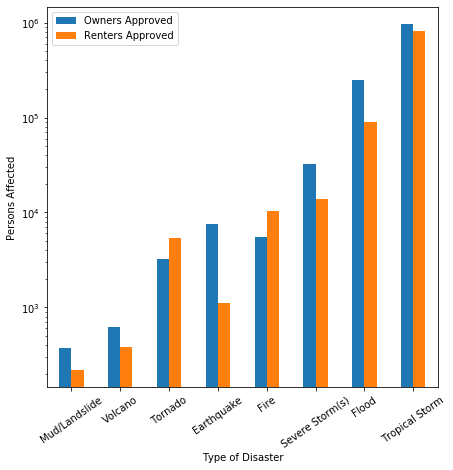

In [18]:
people_grouping = grouping_full.loc[:,["Owners Approved", "Renters Approved"]]
people_chart = people_grouping.plot(kind='bar', logy = True, rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
people_chart.set_xlabel("Type of Disaster")
people_chart.set_ylabel("Persons Affected")

people_chart
plt.savefig('./output_visual/Persons Affected')

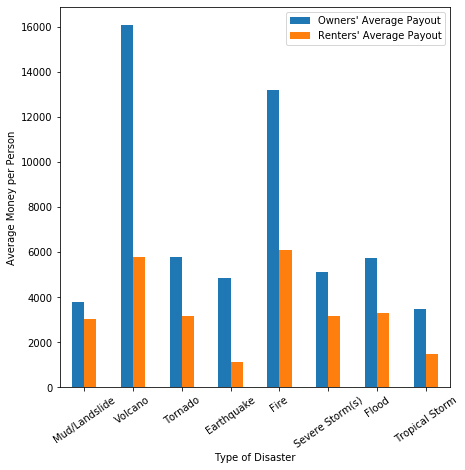

In [19]:
average_grouping = grouping_full.loc[:,["Owners' Average Payout", "Renters' Average Payout"]]
average_chart = average_grouping.plot(kind='bar', rot = 35, figsize = (7, 7))

# Set the xlabel and ylabel using class methods
average_chart.set_xlabel("Type of Disaster")
average_chart.set_ylabel("Average Money per Person")

average_chart
plt.savefig('./output_visual/Average Money per Person')